In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df = pd.read_csv('Cleaned_Sneakers_dataset.csv')
df = df.drop('Unnamed: 0',axis=1)
df

,Title,Brand,Count_of_Rating,Rating,Price,Discount
0,Puma Unisex Palermo LTH Sneaker,Puma Sports India,46,4.4,6999,0
1,Puma Unisex Smashic Sneaker,Puma Sports India,1614,3.9,2019,55
2,Puma Unisex Pacer Marco Sneaker,Viraj Ent,3,3.5,2699,40
3,Puma Men's Court Shatter Low Sneaker,Puma Sports India,232,4.1,2699,55
4,Puma Mens Dazzler Sneaker,Cocoblu Retail,6662,3.9,1584,60
...,...,...,...,...,...,...
170,Puma Men's Glanza v2 Sneaker,Cocoblu Retail,89,3.9,2004,55
171,Puma Men's Jigsaw V1 Sneaker,Cocoblu Retail,10,3.6,1631,66
172,Puma Unisex ST Runner v4 L Sneaker,Cocoblu Retail,73,4.4,3024,45
173,The Aurous Windstorm Laceup Sneakers for Men |...,Luxomish,29,4.2,1499,57


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            175 non-null    object 
 1   Brand            170 non-null    object 
 2   Count_of_Rating  175 non-null    int64  
 3   Rating           175 non-null    float64
 4   Price            175 non-null    int64  
 5   Discount         175 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 8.3+ KB


In [5]:
df.isnull().sum()

Title              0
Brand              5
Count_of_Rating    0
Rating             0
Price              0
Discount           0
dtype: int64

In [6]:
most_common_brand = df['Brand'].mode()[0]  # Lấy giá trị xuất hiện nhiều nhất thay cho NaN
df['Brand'] = df['Brand'].fillna(most_common_brand)

In [7]:
df.isnull().sum()

Title              0
Brand              0
Count_of_Rating    0
Rating             0
Price              0
Discount           0
dtype: int64

### Tạo nhãn phân cụm bằng K-mean

In [8]:
from sklearn.cluster import KMeans

# Chuyển cột cần phân nhóm thành numpy array
X = df[['Price']].values

In [9]:
# Áp dụng K-Means với 3 cụm
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
df['Price_Category'] = kmeans.fit_predict(X)

# Xem số lượng mẫu trong mỗi nhóm
print(df['Price_Category'].value_counts())

Price_Category
0    82
2    71
1    22
Name: count, dtype: int64


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
def label(cluster):
    if cluster == 0:
        return 'Low'
    elif cluster == 2:
        return 'Medium'
    else:
        return 'High'

df['Price_Category'] = df['Price_Category'].apply(label)

In [11]:
print(df['Price_Category'].value_counts())

Price_Category
Low       82
Medium    71
High      22
Name: count, dtype: int64


In [12]:
df.isnull().sum()

Title              0
Brand              0
Count_of_Rating    0
Rating             0
Price              0
Discount           0
Price_Category     0
dtype: int64

In [13]:
df.head()

,Title,Brand,Count_of_Rating,Rating,Price,Discount,Price_Category
0,Puma Unisex Palermo LTH Sneaker,Puma Sports India,46,4.4,6999,0,High
1,Puma Unisex Smashic Sneaker,Puma Sports India,1614,3.9,2019,55,Medium
2,Puma Unisex Pacer Marco Sneaker,Viraj Ent,3,3.5,2699,40,Low
3,Puma Men's Court Shatter Low Sneaker,Puma Sports India,232,4.1,2699,55,Low
4,Puma Mens Dazzler Sneaker,Cocoblu Retail,6662,3.9,1584,60,Medium


### Data Visualization

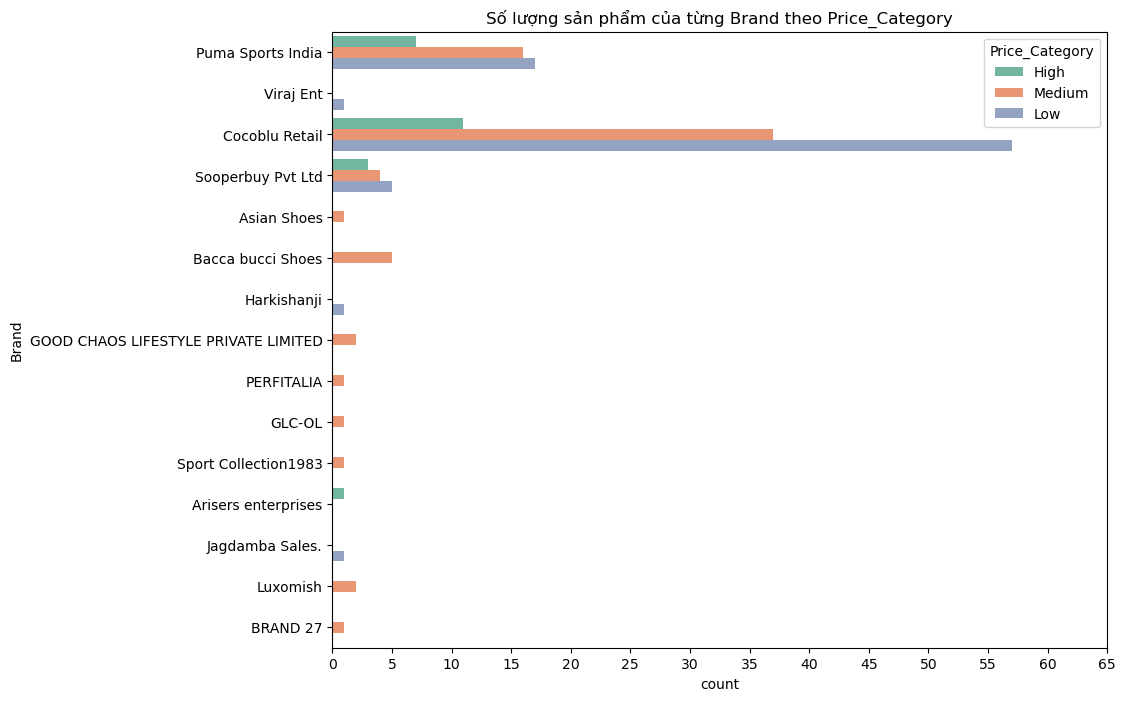

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,y='Brand', hue='Price_Category',palette="Set2")
plt.title("Số lượng sản phẩm của từng Brand theo Price_Category")
plt.xticks(np.arange(0, 70, 5))
plt.show()

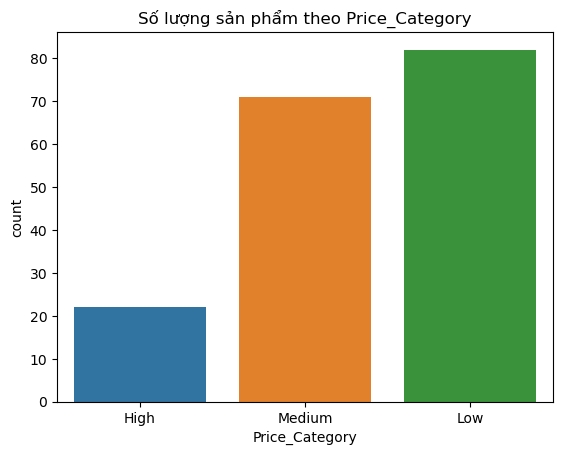

In [15]:
sns.countplot(data=df, x='Price_Category',hue='Price_Category',legend=False)
plt.title("Số lượng sản phẩm theo Price_Category")
plt.show()

In [16]:
df.columns

Index(['Title', 'Brand', 'Count_of_Rating', 'Rating', 'Price', 'Discount',
       'Price_Category'],
      dtype='object')

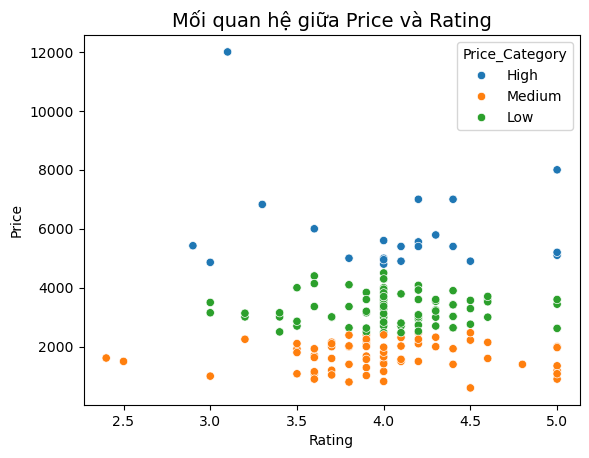

In [17]:
# Mối quan hệ giữa giá và điểm đánh giá
sns.scatterplot(data=df, y='Price', x="Rating", hue='Price_Category')
plt.title("Mối quan hệ giữa Price và Rating", fontsize=14)
plt.show()

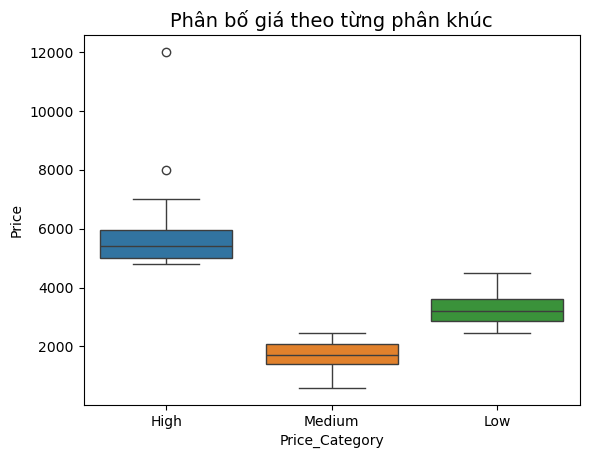

In [18]:
sns.boxplot(data=df,y='Price',x='Price_Category', hue='Price_Category', legend=False)
plt.title("Phân bố giá theo từng phân khúc", fontsize=14)
plt.show()

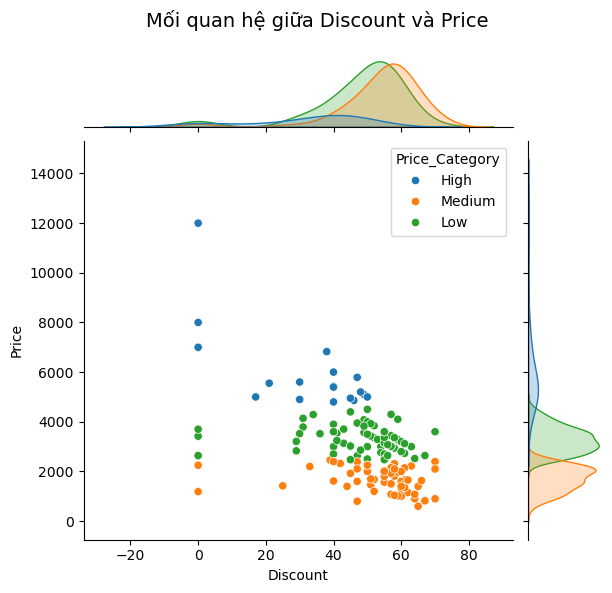

In [19]:
sns.jointplot(x='Discount', y='Price', hue='Price_Category', data=df)
plt.suptitle("Mối quan hệ giữa Discount và Price", fontsize=14)
plt.subplots_adjust(top=0.9)  # Điều chỉnh vị trí tiêu đề
plt.show()

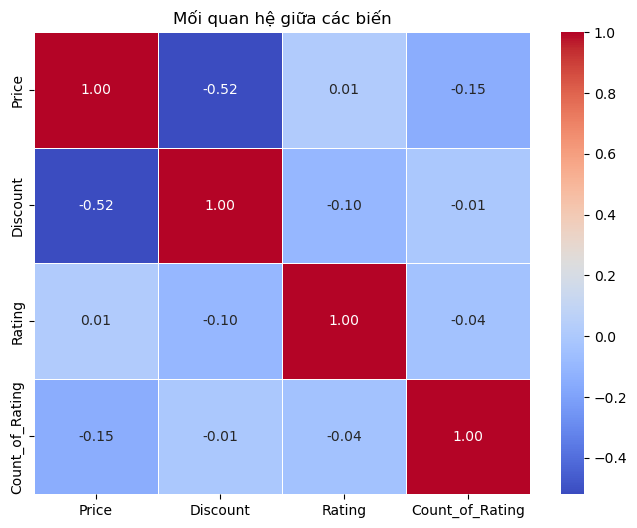

In [20]:
# Chọn các cột số để phân tích tương quan
cols = ['Price', 'Discount', 'Rating', 'Count_of_Rating']

# Tính ma trận tương quan
corr_matrix = df[cols].corr()

# Vẽ heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Thêm tiêu đề
plt.title('Mối quan hệ giữa các biến')
plt.show()

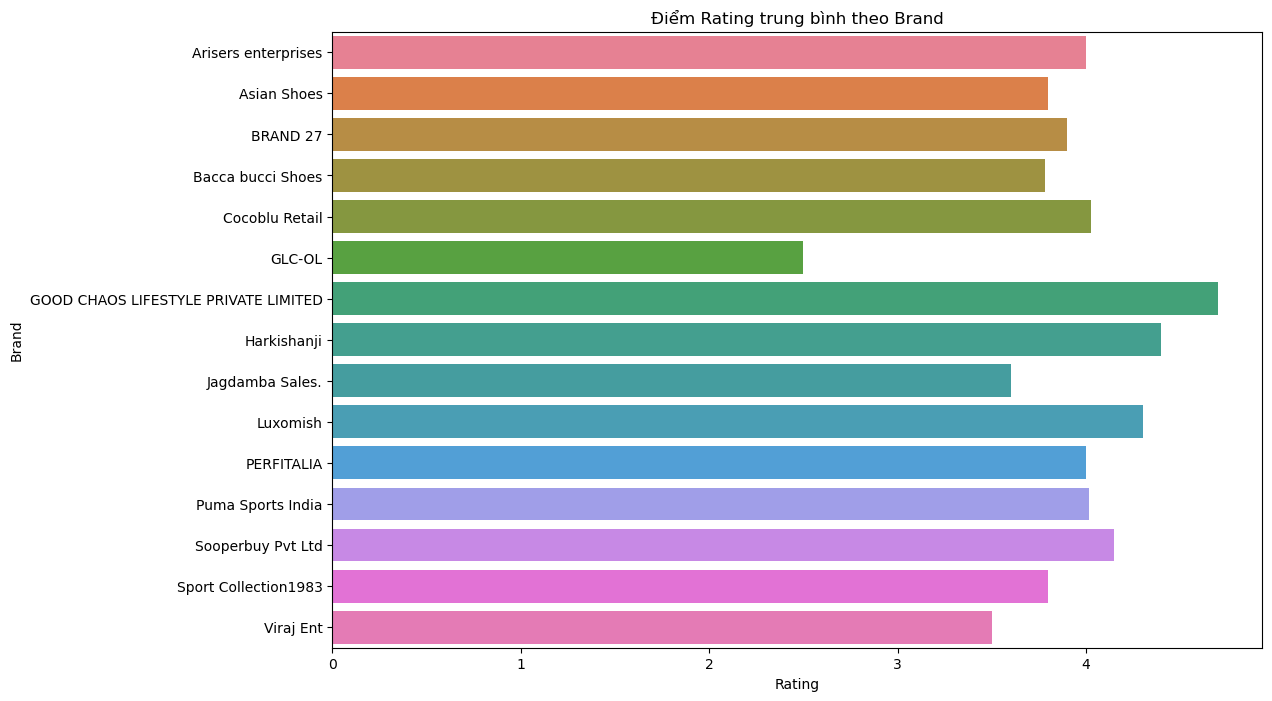

In [21]:
brand_avg = df.groupby('Brand')['Rating'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(y='Brand', x='Rating', data=brand_avg, hue='Brand', legend=False)
plt.title('Điểm Rating trung bình theo Brand')
plt.show()

#### Mã Hóa LabelEncoder dùng cho Tree và RandomForest

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'].astype(str))

In [24]:
df.head()

,Title,Brand,Count_of_Rating,Rating,Price,Discount,Price_Category
0,Puma Unisex Palermo LTH Sneaker,11,46,4.4,6999,0,High
1,Puma Unisex Smashic Sneaker,11,1614,3.9,2019,55,Medium
2,Puma Unisex Pacer Marco Sneaker,14,3,3.5,2699,40,Low
3,Puma Men's Court Shatter Low Sneaker,11,232,4.1,2699,55,Low
4,Puma Mens Dazzler Sneaker,4,6662,3.9,1584,60,Medium


#### Train_test_split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop(['Price_Category','Title'],axis=1)
y = df['Price_Category']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [28]:
# Kiểm tra phân phối lớp trong tập train và test
print("Train set distribution:\n", y_train.value_counts(normalize=True))
print("\nTest set distribution:\n", y_test.value_counts(normalize=True))

# ==> Không có vấn đề lớn về phân phối giữa Train/Test. Dữ liệu có sự mất cân bằng nhẹ, có thể ảnh hưởng đến việc dự đoán lớp "High".

Train set distribution:
 Price_Category
Low       0.478632
Medium    0.401709
High      0.119658
Name: proportion, dtype: float64

Test set distribution:
 Price_Category
Low       0.448276
Medium    0.413793
High      0.137931
Name: proportion, dtype: float64


### DecisionTree

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
tree = DecisionTreeClassifier(max_depth=5,min_samples_split=10,min_samples_leaf=5,ccp_alpha=0.01)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, min_samples_leaf=5,
                       min_samples_split=10)

In [31]:
y_pred = tree.predict(X_test)
y_pred

array(['Low', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Medium',
       'High', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Low',
       'Medium', 'Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'Low', 'High', 'Low', 'Medium', 'Low', 'Low',
       'Low', 'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Low', 'Low', 'Medium', 'High', 'Low', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'High', 'Low', 'Low', 'Medium',
       'Low', 'High', 'High', 'Medium', 'Medium'], dtype=object)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [33]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 26  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         8
         Low       1.00      1.00      1.00        26
      Medium       1.00      1.00      1.00        24

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



### RandomForest

In [34]:
rf = RandomForestClassifier(n_estimators=400)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400)

In [35]:
y_pred = rf.predict(X_test)
y_pred

array(['Low', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Medium',
       'High', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Low',
       'Medium', 'Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'Low', 'High', 'Low', 'Medium', 'Low', 'Low',
       'Low', 'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Low', 'Low', 'Medium', 'High', 'Low', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'High', 'Low', 'Low', 'Medium',
       'Low', 'High', 'High', 'Medium', 'Medium'], dtype=object)

In [37]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 26  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         8
         Low       1.00      1.00      1.00        26
      Medium       1.00      1.00      1.00        24

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



### KNN

In [38]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

##### Mã hóa OneHot cho Brand dùng cho KNN và LogisticRegression

In [39]:
# Tạo bộ mã hóa One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)  

# Mã hóa cột 'Brand'
brand_encoded = encoder.fit_transform(df[['Brand']])  

# Chuyển kết quả thành DataFrame có tên cột rõ ràng
brand_df = pd.DataFrame(brand_encoded, columns=encoder.get_feature_names_out(['Brand']))

##### Chuẩn hóa StandardScaler cho các cột thuộc tính sử dụng cho KNN và LogisticRegression

In [40]:
scaler = StandardScaler()
cols_to_scale = ['Count_of_Rating', 'Rating', 'Price', 'Discount']
scaled_df = pd.DataFrame(scaler.fit_transform(df[cols_to_scale]), columns=cols_to_scale)

In [41]:
# Nhóm thành dataset
df1 = pd.concat([brand_df, scaled_df,df[['Price_Category']]], axis=1)
df1

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand_6,Brand_7,Brand_8,Brand_9,Brand_10,Brand_11,Brand_12,Brand_13,Brand_14,Count_of_Rating,Rating,Price,Discount,Price_Category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.301704,0.802996,2.657230,-3.125938,High
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.187951,-0.258366,-0.629311,0.437624,Medium
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.342556,-1.107455,-0.180547,-0.534257,Low
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.124997,0.166179,-0.180547,0.437624,Low
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.983729,-0.258366,-0.916389,0.761584,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.260853,-0.258366,-0.639211,0.437624,Medium
171,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.335905,-0.895183,-0.885371,1.150336,Medium
172,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.276053,0.802996,0.033936,-0.210296,Low
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.317855,0.378451,-0.972484,0.567208,Medium


In [42]:
X = df1.drop('Price_Category',axis=1)
y = df1['Price_Category']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [44]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 3  1  0]
 [ 0 15  2]
 [ 0  3 11]]
              precision    recall  f1-score   support

        High       1.00      0.75      0.86         4
         Low       0.79      0.88      0.83        17
      Medium       0.85      0.79      0.81        14

    accuracy                           0.83        35
   macro avg       0.88      0.81      0.84        35
weighted avg       0.84      0.83      0.83        35



### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression(penalty='l1',solver='liblinear',C=1.0)  
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [47]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 4  0  0]
 [ 0 17  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         4
         Low       1.00      1.00      1.00        17
      Medium       1.00      1.00      1.00        14

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



### Kết Luận: Mô hình DecisionTree, Randomforest, LogisticRegression phù hợp với dữ liệu hơn so với KNN. Ba mô hình trên đưa ra dự đoán chính xác nhất về phân khúc giày.

##### Lưu mô hình sử dụng dự đoán phân khúc giá giày

In [52]:
import joblib
# 1. Lưu model bằng joblib
joblib.dump(rf, "shoe_price_model.pkl")
print("✅ Đã lưu mô hình Random Forest!")

✅ Đã lưu mô hình Random Forest!
